# Linear SVM using Gradient Descent

In [1]:
# Import the required modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

The loss function is given by --

$\large J(w) = {\LARGE[} \frac{1}{n}\sum_{i=1}^{n}max(0, 1 - y_i(w \cdot x_i + b)){\LARGE]} + \lambda ||w||^2$

The gradient is given by --

$\large \nabla J(w) = {\LARGE[} \frac{1}{n}\sum_{i=1}^{n}d_i){\LARGE]} + 2\lambda w$

where $d_i$ is given by --

$d_i = 0$ if $y_i(w \cdot x_i + b) > 0$ 
else $d_i = - y_i x_i$

This can also be written as --

$\large \nabla J(w) = {\LARGE[} -\frac{1}{n}\sum_{i=1}^{n}max(0, 1 - y_i(w \cdot x_i + b))y_i x_i{\LARGE]} + 2\lambda w$

This gradient update is done using --

$w = w + \alpha \nabla J(w)$

In [2]:
# SVM Class
class SVM(object):
    def __init__(self, niters=10, alpha=.1, lamb=.001, verbose=False):
        # Number of iterations
        self.niters = niters
        # Weight Vectors
        self.w = None
        # Loss after niters -- else 0
        self.loss = None
        # Learning Rate
        self.alpha = alpha
        # Lambda -- Look Formula
        self.lamb = lamb
        # If verbose is True -- then loss is printed during evaluation
        self.verbose = verbose
        self.loss_cum = []
    def fit(self, x, y):
        self.loss_cum = []
        # 1 added at one -- Bias
        x = np.hstack((x, np.ones((x.shape[0], 1))))
        self.w = np.zeros((x.shape[1], ))
        for iter in range(self.niters):
            # Current Loss
            self.loss = np.mean([np.max([0, 1 - y_i*np.dot(self.w.T, x_i)]) + self.lamb*np.dot(self.w.T, self.w) for y_i, x_i in zip(y, x)])
            # Cumulative Loss
            self.loss_cum.append(self.loss)
            # Print the loss if verbose flag is set
            if iter % 25 == 0 and self.verbose:
                print('Loss at iteration {} = {}'.format(iter, self.loss))
            # Calculate the gradients
            dJdw = np.mean([2*self.lamb*self.w if y_i*np.dot(self.w.T, x_i) > 0 else - y_i*x_i.T + 2*self.lamb*self.w for y_i, x_i in zip(y, x)], axis=0)
            # Perform Gradient Descent Update
            self.w = self.w - self.alpha*dJdw
            
    def predict(self, x):
        # Add 1 at the end of each test sample
        x = np.hstack((x, np.ones((x.shape[0], 1))))
        # Return the prediction
        return np.array([np.sign(np.dot(self.w.T, x_i)) for x_i in x])
    
    def accuracy(self, x, y):
        return 1.0*np.sum(self.predict(x) == y)/y.shape[0]

Weights are = [ -5.49943736e-08   4.66403171e-08   7.25080775e-08]
Loss = 0.999999837427
Training Set Accuracy = 0.875


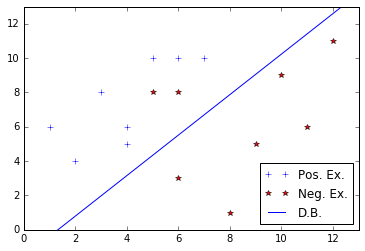

In [3]:
# Some not so random data -- I hand-crafted it to work :)
x = np.array([[1, 6], [2, 4], [4, 5], [3, 8], [4, 6], [5, 10] ,[7, 10], [6, 10], [6, 3],[8, 1],[9, 5],[10, 9],[11, 6],[12, 11], [5, 8], [6, 8]])
y = np.array([1]*8 + [-1]*8)

# Create the classifier
svm = SVM(niters=10000, lamb=10000, alpha=.00000001)

# Train the classifier
svm.fit(x, y)

# Display the weights and the final loss
print('Weights are = {}'.format(svm.w))
print('Loss = {}'.format(svm.loss))
print('Training Set Accuracy = {}'.format(svm.accuracy(x, y)))

# Plot the results -- just some cosmetics
x_min, x_max, y_min, y_max = 0 , 13, 0, 13
plt.axis([x_min, x_max, y_min, y_max])
y_min_val = (svm.w[0] * x_min + svm.w[2])/-svm.w[1]
y_max_val = (svm.w[0] * x_max + svm.w[2])/-svm.w[1]
plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'b+', label='Pos. Ex.')
plt.plot(x[:, 0][y==-1], x[:, 1][y==-1], 'r*', label='Neg. Ex.')
plt.plot([x_min, x_max], [y_min_val, y_max_val], label='D.B.') # D.B. -- Decision Boundary
plt.legend(loc='lower right')

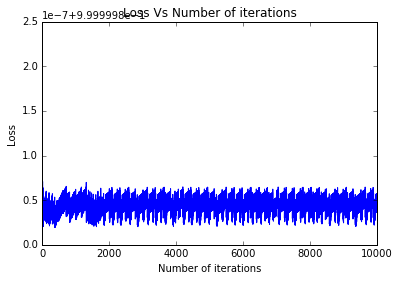

In [4]:
# Plot of Loss Vs Number of iterations
# This plot helps in visualizing the convergence of the classifier
plt.plot(range(0, len(svm.loss_cum)), svm.loss_cum)
plt.title('Loss Vs Number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')

Weights are = [ -6.25000000e-08   3.75000000e-08   6.81250000e-08]
Loss = 0.99999985457
Training Set Accuracy = 0.9375


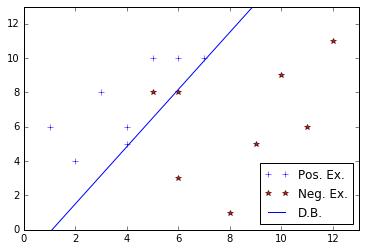

In [5]:
# Setting Lambda = 0 means we only want to minimize the misclassification error
svm.lamb = 0

# Train the classifier
svm.fit(x, y)

# Display the weights and the final loss
print('Weights are = {}'.format(svm.w))
print('Loss = {}'.format(svm.loss))
print('Training Set Accuracy = {}'.format(svm.accuracy(x, y)))

# Plot the results -- just some cosmetics
x_min, x_max, y_min, y_max = 0 , 13, 0, 13
plt.axis([x_min, x_max, y_min, y_max])
y_min_val = (svm.w[0] * x_min + svm.w[2])/-svm.w[1]
y_max_val = (svm.w[0] * x_max + svm.w[2])/-svm.w[1]
plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'b+', label='Pos. Ex.')
plt.plot(x[:, 0][y==-1], x[:, 1][y==-1], 'r*', label='Neg. Ex.')
plt.plot([x_min, x_max], [y_min_val, y_max_val], label='D.B.') # D.B. -- Decision Boundary
plt.legend(loc='lower right')

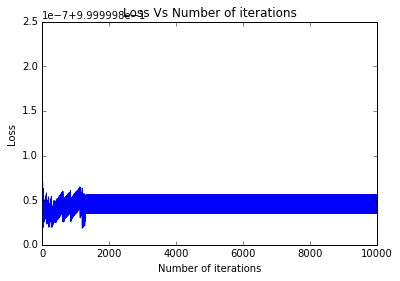

In [6]:
# Plot of Loss Vs Number of iterations
# This plot helps in visualizing the convergence of the classifier
plt.plot(range(0, len(svm.loss_cum)), svm.loss_cum)
plt.title('Loss Vs Number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')